In [1]:
import gmplot
import pandas as pd
import requests 
import os
import math
from xml.etree.ElementTree import fromstring, ElementTree
from datetime import datetime
import json
import statistics 
from collections import Counter
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TrafficEvents = None

chunk_size = 1000

BASE_PATH = "/home/amin/CETI/RoadConstruction/TrafficEventData/part/speeds/speed_"
    
index_folder = 0
index_start_point_file = 0
index_end_point_file = 411

In [3]:
def read_data(path):
    data = None
    data = pd.read_csv(path)
    return data

In [4]:
def read_part_data(folder_id, index_start, index_end):
    df = None
    print("start time is {}".format(datetime.now()))
    for i in range(index_start, index_end):
        type_of_ways_all_points = []
        path = BASE_PATH + str(folder_id) + "/" + str(i) + "_file_"+ str(i) + ".csv"

        data = read_data(path)
        df = data.append(df, ignore_index = True)
    print("end time is {}".format(datetime.now()))
    return df

In [5]:
df = None
for i in range(0,9):
    print(i)
    data = read_part_data(i, 0, 411)
    df = data.append(df, ignore_index = True)
print(9)
data = read_part_data(9, 0, 393)
df = data.append(df, ignore_index = True)

0
start time is 2020-09-15 18:57:43.136604
end time is 2020-09-15 18:59:16.414891
1
start time is 2020-09-15 18:59:16.712108
end time is 2020-09-15 19:00:51.488774
2
start time is 2020-09-15 19:00:52.393694
end time is 2020-09-15 19:02:28.409788
3
start time is 2020-09-15 19:02:29.566589
end time is 2020-09-15 19:03:58.757896
4
start time is 2020-09-15 19:04:00.281220
end time is 2020-09-15 19:05:27.366845
5
start time is 2020-09-15 19:05:29.395095
end time is 2020-09-15 19:07:00.011862
6
start time is 2020-09-15 19:07:02.734967
end time is 2020-09-15 19:08:31.419261
7
start time is 2020-09-15 19:08:34.566730
end time is 2020-09-15 19:10:07.646348
8
start time is 2020-09-15 19:10:11.550537
end time is 2020-09-15 19:11:48.317601
9
start time is 2020-09-15 19:11:52.984269
end time is 2020-09-15 19:13:22.720880


In [6]:
df.head(10)

,Id,Source,Type,EventCode,Severity,StartPoint_Lat,StartPoint_Lng,EndPoint_Lat,EndPoint_Lng,Distance(mi),...,Turning_Circle,Turning_Loop,nearst_nodes_of_start_point,nearst_nodes_of_end_point,nearst_nodes_ids_of_start_point,nearst_nodes_ids_of_end_point,type_of_roads,avg_speed,distance,eta
0,M-29450881,MapQuest,Construction,406.0,3,44.309494,-90.840271,NaN,NaN,0.86,...,False,False,"{'waypoints': [{'nodes': [2147408021, 47184371...","{'waypoints': [{'nodes': [2147408021, 47184371...","[2147408021, 471843710, 2147408024, 2147408021...","[2147408021, 471843710, 2147408024, 2147408021...",motorway_link,-100.0,-100.0,-100.0
1,M-29450890,MapQuest,Construction,703.0,2,44.387669,-88.720055,NaN,NaN,0.12,...,False,False,"{'waypoints': [{'nodes': [232006634, 232006479...","{'waypoints': [{'nodes': [232006634, 232006479...","[232006634, 232006479, 2281677742, 232006634, ...","[232006634, 232006479, 2281677742, 232006634, ...",trunk,-100.0,-100.0,-100.0
2,M-29450891,MapQuest,Construction,703.0,2,44.403862,-88.734856,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [232006387, 232006382...","{'waypoints': [{'nodes': [232006387, 232006382...","[232006387, 232006382, 232006382, 231764181, 2...","[232006387, 232006382, 232006382, 231764181, 2...",trunk,-100.0,-100.0,-100.0
3,M-29450947,MapQuest,Construction,735.0,3,44.734169,-90.497337,NaN,NaN,0.10,...,False,False,"{'waypoints': [{'nodes': [147039746, 147017038...","{'waypoints': [{'nodes': [147039746, 147017038...","[147039746, 147017038, 147017038, 147017035, 1...","[147039746, 147017038, 147017038, 147017035, 1...",residential,-100.0,-100.0,-100.0
4,M-29450948,MapQuest,Construction,735.0,3,44.734177,-90.496017,NaN,NaN,0.10,...,False,False,"{'waypoints': [{'nodes': [3372527386, 14701703...","{'waypoints': [{'nodes': [3372527386, 14701703...","[3372527386, 147017032, 3372527390, 147017032,...","[3372527386, 147017032, 3372527390, 147017032,...",primary,-100.0,-100.0,-100.0
5,M-29452018,MapQuest,Construction,641.0,2,43.074471,-88.066605,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [0, 196651378], 'hint...","{'waypoints': [{'nodes': [0, 196651378], 'hint...","[0, 196651378, 0, 233349076, 0, 196651380, 0, ...","[0, 196651378, 0, 233349076, 0, 196651380, 0, ...",None,-100.0,-100.0,-100.0
6,M-29452119,MapQuest,Construction,701.0,2,42.353142,-87.977654,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [235603291, 235603296...","{'waypoints': [{'nodes': [235603291, 235603296...","[235603291, 235603296, 235603291, 235587571, 7...","[235603291, 235603296, 235603291, 235587571, 7...",secondary,-100.0,-100.0,-100.0
7,M-29452120,MapQuest,Construction,701.0,2,42.385311,-87.963326,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [1514677298, 23544272...","{'waypoints': [{'nodes': [1514677298, 23544272...","[1514677298, 235442729, 0, 1514677298, 1514677...","[1514677298, 235442729, 0, 1514677298, 1514677...",primary,-100.0,-100.0,-100.0
8,M-29452121,MapQuest,Construction,500.0,2,42.346806,-87.902145,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [235210040, 181946597...","{'waypoints': [{'nodes': [235210040, 181946597...","[235210040, 1819465977, 726669678, 726669806, ...","[235210040, 1819465977, 726669678, 726669806, ...",trunk_link,-100.0,-100.0,-100.0
9,M-29452122,MapQuest,Construction,701.0,2,42.716621,-88.225945,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [992846309, 473621036...","{'waypoints': [{'nodes': [992846309, 473621036...","[992846309, 4736210361, 1073297157, 1102350902...","[992846309, 4736210361, 1073297157, 1102350902...",trunk,-100.0,-100.0,-100.0


In [7]:
df.shape

(2046000, 66)

In [9]:
df_city_state_type_of_roads_group = df.groupby(["City", "State", "type_of_roads"])

In [10]:
df_city_state_type_of_roads_group_count = df_city_state_type_of_roads_group.size().reset_index(name='counts')

In [11]:
df_city_state_type_of_roads_group_count.head()

,City,State,type_of_roads,counts
0,Aaronsburg,PA,primary,5
1,Aaronsburg,PA,residential,1
2,Abbeville,AL,residential,3
3,Abbeville,AL,secondary,4
4,Abbeville,GA,primary,3


In [12]:
df_state_type_of_roads_group = df.groupby(["State", "type_of_roads"])

In [13]:
df_state_type_of_roads_group_count = df_state_type_of_roads_group.size().reset_index(name='counts')

In [30]:
df_state_type_of_roads_group_count.head(10)

,State,type_of_roads,counts
0,AL,None,856
1,AL,cycleway,2
2,AL,footway,1
3,AL,motorway,4160
4,AL,motorway_link,472
5,AL,primary,1197
6,AL,primary_link,46
7,AL,residential,694
8,AL,secondary,762
9,AL,secondary_link,23


In [17]:
df_type_of_roads_group = df.groupby(["type_of_roads"])

In [18]:
df_type_of_roads_group_count = df_type_of_roads_group.size().reset_index(name='counts')

In [29]:
df_type_of_roads_group_count.head(10)

,type_of_roads,counts
0,None,171165
1,abandoned,12
2,construction,787
3,cycleway,145
4,footway,3102
5,living_street,195
6,motorway,598895
7,motorway_link,228808
8,path,96
9,pedestrian,25


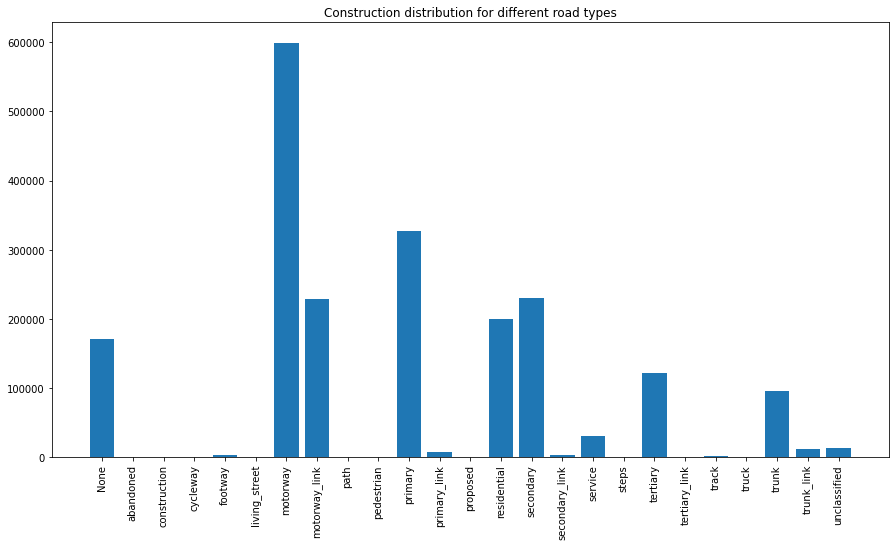

In [23]:
plt.figure(figsize= (15,8))
plt.bar(x=df_type_of_roads_group_count['type_of_roads'], height=df_type_of_roads_group_count['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for different road types")
plt.savefig("Construction-distribution-different-road-types.png")

In [24]:
df_type_of_roads_group_count_sorted = df_type_of_roads_group_count.sort_values(by=['counts'], ascending=False)

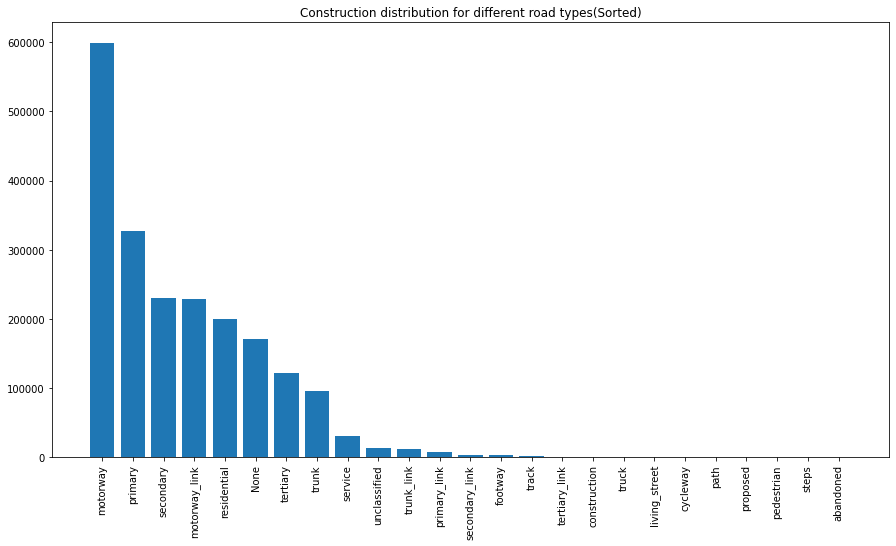

In [25]:
plt.figure(figsize= (15,8))
plt.bar(x=df_type_of_roads_group_count_sorted['type_of_roads'], height=df_type_of_roads_group_count_sorted['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for different road types(Sorted)")
plt.savefig("Construction-distribution-different-road-types-sorted.png")

In [28]:
df_type_of_roads_group_count_sorted.head(10)

,type_of_roads,counts
6,motorway,598895
10,primary,327411
14,secondary,229942
7,motorway_link,228808
13,residential,200321
0,None,171165
18,tertiary,121196
22,trunk,95444
16,service,30091
24,unclassified,13684


In [31]:
df_state_group = df.groupby(["State"])

In [32]:
df_state_group_count = df_state_group.size().reset_index(name='counts')

In [33]:
df_state_group_count_sorted = df_state_group_count.sort_values(by=['counts'], ascending=False)

In [35]:
df_state_group_count_sorted.head()

,State,counts
3,CA,257466
36,PA,203070
32,NY,172605
8,FL,120505
4,CO,104827


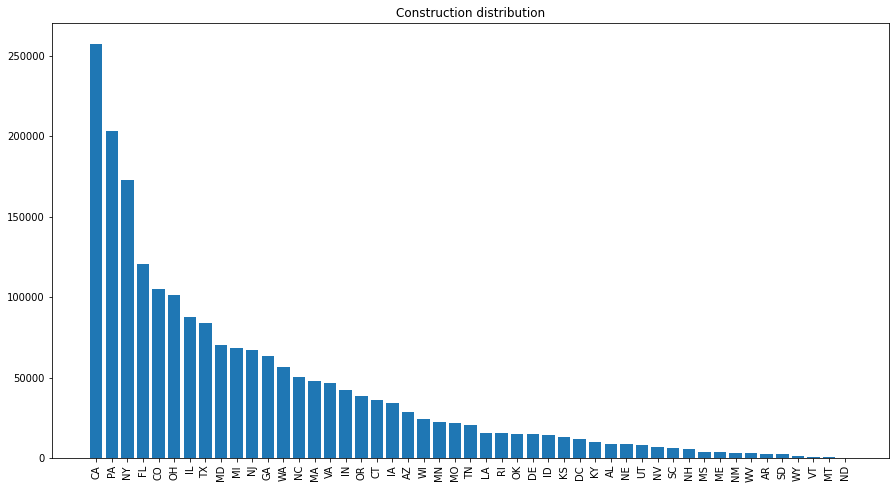

In [36]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_group_count_sorted['State'], height=df_state_group_count_sorted['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution")
plt.savefig("Construction-distribution.png")

In [39]:
df_state_type_of_roads_group_count.head()

,State,type_of_roads,counts
0,AL,None,856
1,AL,cycleway,2
2,AL,footway,1
3,AL,motorway,4160
4,AL,motorway_link,472


In [41]:
df_state_type_of_roads_group_count_motorway = df_state_type_of_roads_group_count[df_state_type_of_roads_group_count.type_of_roads == "motorway"]

In [42]:
df_state_type_of_roads_group_count_motorway.head()

,State,type_of_roads,counts
3,AL,motorway,4160
17,AR,motorway,739
35,AZ,motorway,4194
56,CA,motorway,65466
78,CO,motorway,24693


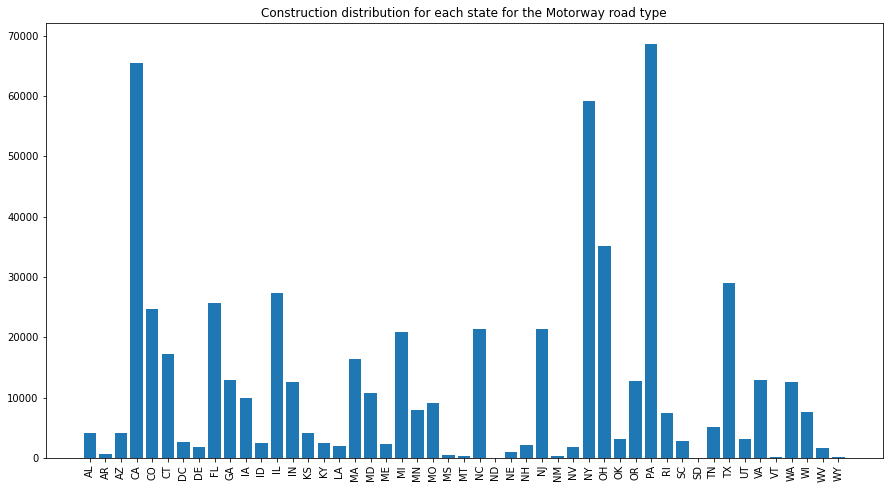

In [43]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_type_of_roads_group_count_motorway['State'], height=df_state_type_of_roads_group_count_motorway['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for each state for the Motorway road type")
plt.savefig("Construction-distribution-each-state-Motorway-road-type.png")

In [44]:
df_state_type_of_roads_group_count_primary = df_state_type_of_roads_group_count[df_state_type_of_roads_group_count.type_of_roads == "primary"]

In [45]:
df_state_type_of_roads_group_count_primary.head()

,State,type_of_roads,counts
5,AL,primary,1197
19,AR,primary,380
39,AZ,primary,3248
60,CA,primary,48212
81,CO,primary,19854


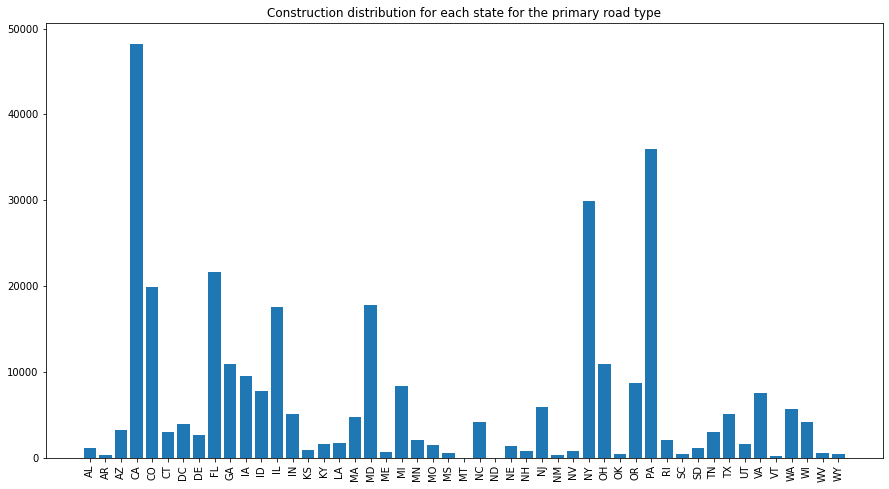

In [46]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_type_of_roads_group_count_primary['State'], height=df_state_type_of_roads_group_count_primary['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for each state for the primary road type")
plt.savefig("Construction-distribution-each-state-primary-road-type.png")

In [47]:
df_state_type_of_roads_group_count_secondary = df_state_type_of_roads_group_count[df_state_type_of_roads_group_count.type_of_roads == "secondary"]

In [48]:
df_state_type_of_roads_group_count_secondary.head()

,State,type_of_roads,counts
8,AL,secondary,762
22,AR,secondary,307
43,AZ,secondary,8090
64,CA,secondary,29949
84,CO,secondary,9919


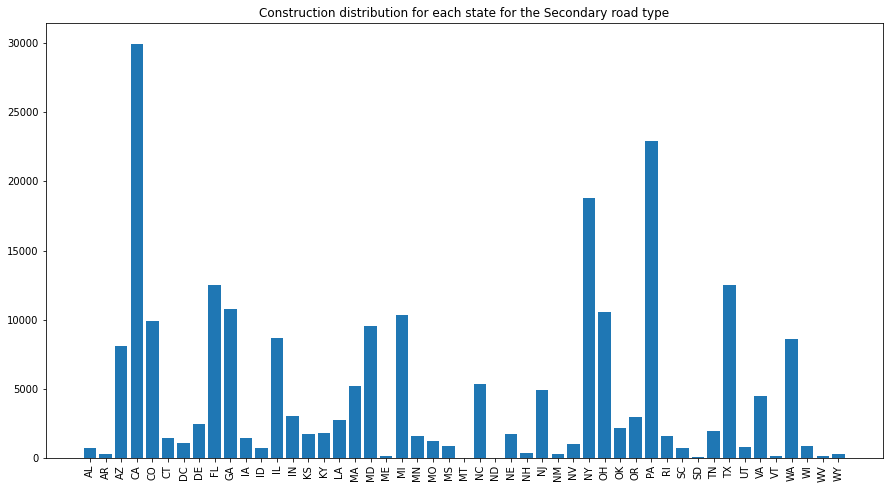

In [49]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_type_of_roads_group_count_secondary['State'], height=df_state_type_of_roads_group_count_secondary['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for each state for the Secondary road type")
plt.savefig("Construction-distribution-each-state-secondary-road-type.png")

In [50]:
df_state_type_of_roads_group_count_motorway_link = df_state_type_of_roads_group_count[df_state_type_of_roads_group_count.type_of_roads == "motorway_link"]

In [51]:
df_state_type_of_roads_group_count_motorway_link.head()

,State,type_of_roads,counts
4,AL,motorway_link,472
18,AR,motorway_link,124
36,AZ,motorway_link,2565
57,CA,motorway_link,40570
79,CO,motorway_link,7645


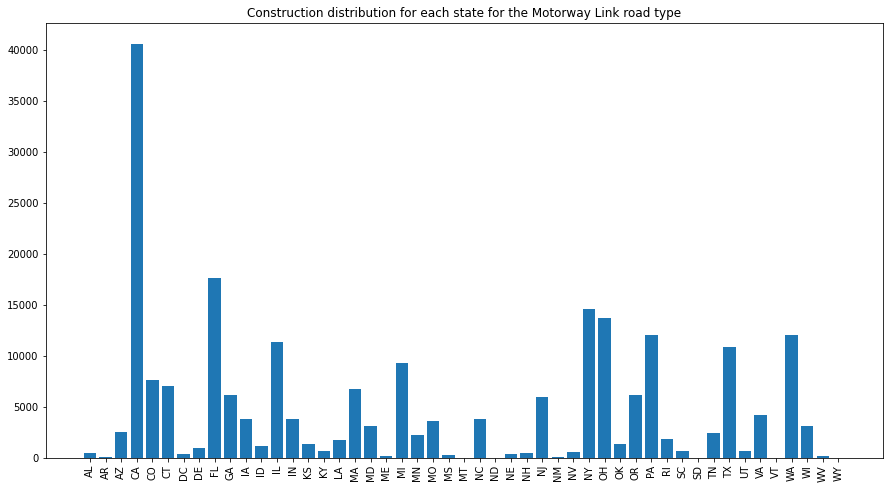

In [52]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_type_of_roads_group_count_motorway_link['State'], height=df_state_type_of_roads_group_count_motorway_link['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for each state for the Motorway Link road type")
plt.savefig("Construction-distribution-each-state-motorway_link-road-type.png")

In [53]:
df_state_type_of_roads_group_count_residential= df_state_type_of_roads_group_count[df_state_type_of_roads_group_count.type_of_roads == "residential"]

In [54]:
df_state_type_of_roads_group_count_residential.head()

,State,type_of_roads,counts
7,AL,residential,694
21,AR,residential,317
42,AZ,residential,4349
63,CA,residential,24979
83,CO,residential,14615


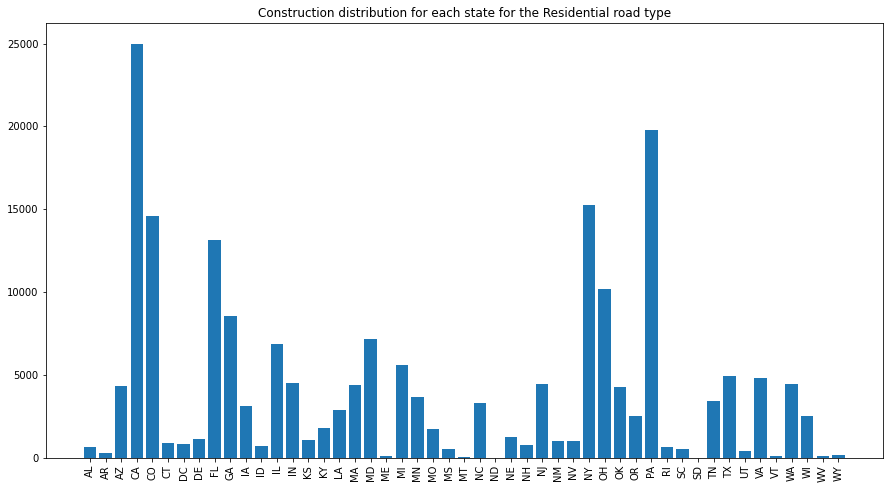

In [56]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_type_of_roads_group_count_residential['State'], height=df_state_type_of_roads_group_count_residential['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for each state for the Residential road type")
plt.savefig("Construction-distribution-each-state-residential-road-type.png")

In [57]:
df_state_type_of_roads_group_count_tertiary = df_state_type_of_roads_group_count[df_state_type_of_roads_group_count.type_of_roads == "tertiary"]

In [58]:
df_state_type_of_roads_group_count_tertiary.head()

,State,type_of_roads,counts
11,AL,tertiary,556
25,AR,tertiary,158
46,AZ,tertiary,1633
68,CA,tertiary,12756
87,CO,tertiary,4597


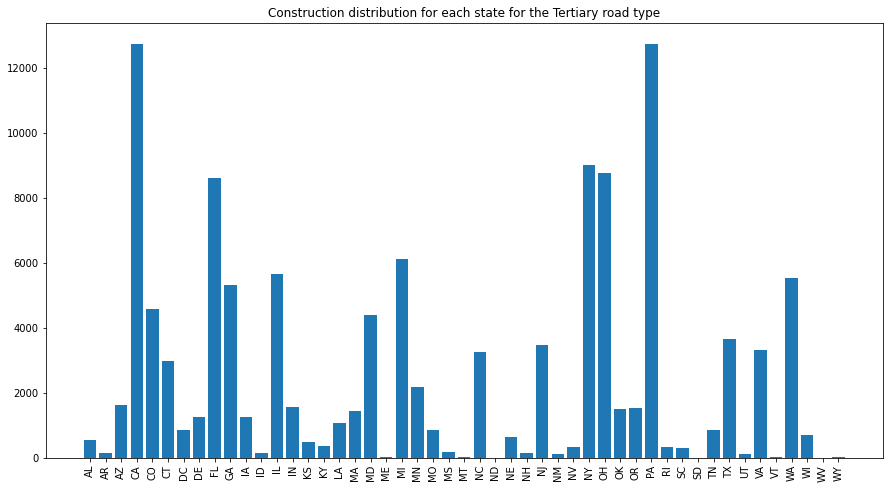

In [59]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_type_of_roads_group_count_tertiary['State'], height=df_state_type_of_roads_group_count_tertiary['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for each state for the Tertiary road type")
plt.savefig("Construction-distribution-each-state-tertiary-road-type.png")

In [60]:
df_state_type_of_roads_group_count_trunk = df_state_type_of_roads_group_count[df_state_type_of_roads_group_count.type_of_roads == "trunk"]

In [61]:
df_state_type_of_roads_group_count_trunk.head()

,State,type_of_roads,counts
13,AL,trunk,18
28,AR,trunk,43
49,AZ,trunk,542
71,CA,trunk,7680
90,CO,trunk,6588


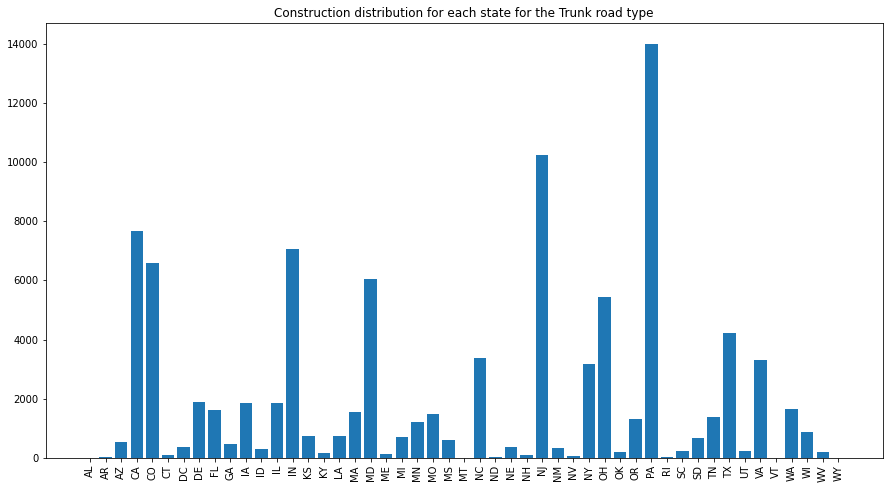

In [62]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_type_of_roads_group_count_trunk['State'], height=df_state_type_of_roads_group_count_trunk['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for each state for the Trunk road type")
plt.savefig("Construction-distribution-each-state-trunk-road-type.png")

In [63]:
df_state_type_of_roads_group_count_service = df_state_type_of_roads_group_count[df_state_type_of_roads_group_count.type_of_roads == "service"]

In [64]:
df_state_type_of_roads_group_count_service.head()

,State,type_of_roads,counts
10,AL,service,83
24,AR,service,22
45,AZ,service,506
66,CA,service,3514
86,CO,service,2146


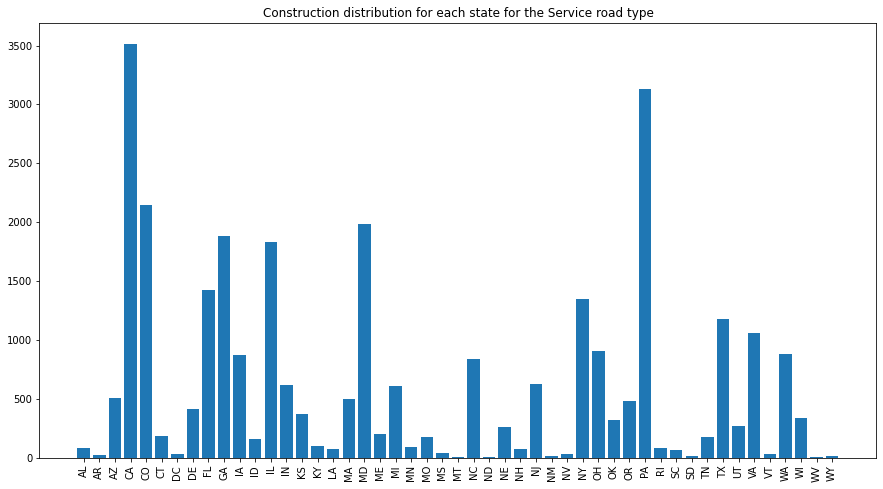

In [65]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_type_of_roads_group_count_service['State'], height=df_state_type_of_roads_group_count_service['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for each state for the Service road type")
plt.savefig("Construction-distribution-each-state-service-road-type.png")

In [66]:
df_city_state_group = df.groupby(["City", "State"])

In [67]:
df_city_state_group_count = df_city_state_group.size().reset_index(name='counts')

In [68]:
df_city_state_group_count.head()

,City,State,counts
0,Aaronsburg,PA,6
1,Abbeville,AL,7
2,Abbeville,GA,4
3,Abbeville,LA,12
4,Abbeville,SC,1


In [69]:
df_city_state_group_count_sorted = df_city_state_group_count.sort_values(by=['counts'], ascending=False)

In [75]:
df_city_state_group_count_sorted.head(10)

,City,State,counts
10916,New York,NY,34505
632,Atlanta,GA,30784
9874,Miami,FL,30043
8958,Los Angeles,CA,22250
12286,Pittsburgh,PA,18849
4013,Denver,CO,17750
12141,Philadelphia,PA,15329
7233,Houston,TX,14891
11604,Orlando,FL,14316
3035,Cleveland,OH,13723


In [76]:
states = ["NY", "GA", "FL", "CA", "PA", "CO", "PA", "TX", "FL", "OH"]

In [77]:
df_city_state_group_count_sorted_filter = df_city_state_group_count_sorted.loc[:, df_city_state_group_count_sorted.columns.intersection(states)]

In [78]:
df_city_state_group_count_sorted_filter.head()

""
10916
632
9874
8958
12286


In [84]:
df_filter_state = df[
   (df["State"] == "NY") |
   (df["State"] =="GA") |
   (df["State"] == "FL") |
   (df["State"]== "CA") |
   (df["State"] == "PA") |
   (df["State"] == "CO") |
   (df["State"] == "PA") |
   (df["State"] == "TX") |
   (df["State"] == "FL") |
   (df["State"] == "OH")
]

In [85]:
df_filter_state.head()

,Id,Source,Type,EventCode,Severity,StartPoint_Lat,StartPoint_Lng,EndPoint_Lat,EndPoint_Lng,Distance(mi),...,Turning_Circle,Turning_Loop,nearst_nodes_of_start_point,nearst_nodes_of_end_point,nearst_nodes_ids_of_start_point,nearst_nodes_ids_of_end_point,type_of_roads,avg_speed,distance,eta
33,M-29455045,MapQuest,Construction,703.0,3,31.457281,-97.172211,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [0, 236170635], 'hint...","{'waypoints': [{'nodes': [0, 236170635], 'hint...","[0, 236170635, 1396909678, 236170635, 0, 75308...","[0, 236170635, 1396909678, 236170635, 0, 75308...",residential,-100.0,-100.0,-100.0
41,M-29458660,MapQuest,Construction,817.0,3,39.779926,-105.137856,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [1903821684, 26945921...","{'waypoints': [{'nodes': [1903821684, 26945921...","[1903821684, 269459210, 2235184897, 3639923343...","[1903821684, 269459210, 2235184897, 3639923343...",primary,-100.0,-100.0,-100.0
42,M-29458667,MapQuest,Construction,701.0,2,38.969212,-104.798676,NaN,NaN,4.73,...,False,False,"{'waypoints': [{'nodes': [0, 2072487136], 'hin...","{'waypoints': [{'nodes': [0, 2072487136], 'hin...","[0, 2072487136, 0, 2072487136, 0, 2072486421, ...","[0, 2072487136, 0, 2072487136, 0, 2072486421, ...",None,-100.0,-100.0,-100.0
43,M-29458668,MapQuest,Construction,701.0,2,38.926628,-104.682854,NaN,NaN,3.38,...,False,False,"{'waypoints': [{'nodes': [0, 5911723255], 'hin...","{'waypoints': [{'nodes': [0, 5911723255], 'hin...","[0, 5911723255, 0, 55703774, 0, 6710058262, 0,...","[0, 5911723255, 0, 55703774, 0, 6710058262, 0,...",None,-100.0,-100.0,-100.0
44,M-29458728,MapQuest,Construction,703.0,2,39.725700,-105.000168,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [1045164970, 10451650...","{'waypoints': [{'nodes': [1045164970, 10451650...","[1045164970, 1045165006, 0, 4575057222, 344237...","[1045164970, 1045165006, 0, 4575057222, 344237...",motorway,-100.0,-100.0,-100.0


In [86]:
df_filter_state.shape

(1107574, 66)

In [87]:
df_city_state_group_count_sorted.head(10)

,City,State,counts
10916,New York,NY,34505
632,Atlanta,GA,30784
9874,Miami,FL,30043
8958,Los Angeles,CA,22250
12286,Pittsburgh,PA,18849
4013,Denver,CO,17750
12141,Philadelphia,PA,15329
7233,Houston,TX,14891
11604,Orlando,FL,14316
3035,Cleveland,OH,13723


In [88]:
df_filter_state_city = df_filter_state[
   (df_filter_state["City"] == "New York") |
   (df_filter_state["City"] =="Atlanta") |
   (df_filter_state["City"] == "Miami") |
   (df_filter_state["City"]== "Los Angeles") |
   (df_filter_state["City"] == "Pittsburgh") |
   (df_filter_state["City"] == "Denver") |
   (df_filter_state["City"] == "Philadelphia") |
   (df_filter_state["City"] == "Houston") |
   (df_filter_state["City"] == "Orlando") |
   (df_filter_state["City"] == "Cleveland")
]

In [89]:
df_filter_state_city.head()

,Id,Source,Type,EventCode,Severity,StartPoint_Lat,StartPoint_Lng,EndPoint_Lat,EndPoint_Lng,Distance(mi),...,Turning_Circle,Turning_Loop,nearst_nodes_of_start_point,nearst_nodes_of_end_point,nearst_nodes_ids_of_start_point,nearst_nodes_ids_of_end_point,type_of_roads,avg_speed,distance,eta
44,M-29458728,MapQuest,Construction,703.0,2,39.725700,-105.000168,NaN,NaN,0.0,...,False,False,"{'waypoints': [{'nodes': [1045164970, 10451650...","{'waypoints': [{'nodes': [1045164970, 10451650...","[1045164970, 1045165006, 0, 4575057222, 344237...","[1045164970, 1045165006, 0, 4575057222, 344237...",motorway,-100.0,-100.0,-100.0
48,M-29458949,MapQuest,Construction,493.0,2,39.780144,-104.959290,NaN,NaN,0.0,...,False,False,"{'waypoints': [{'nodes': [0, 90850751], 'hint'...","{'waypoints': [{'nodes': [0, 90850751], 'hint'...","[0, 90850751, 7722343308, 7722343316, 77223433...","[0, 90850751, 7722343308, 7722343316, 77223433...",None,-100.0,-100.0,-100.0
102,M-29465177,MapQuest,Construction,701.0,2,33.969830,-118.280235,NaN,NaN,0.0,...,False,False,"{'waypoints': [{'nodes': [0, 123280908], 'hint...","{'waypoints': [{'nodes': [0, 123280908], 'hint...","[0, 123280908, 4954115856, 123280908, 0, 63885...","[0, 123280908, 4954115856, 123280908, 0, 63885...",residential,-100.0,-100.0,-100.0
103,M-29465178,MapQuest,Construction,701.0,2,33.970448,-118.273911,NaN,NaN,0.0,...,False,False,"{'waypoints': [{'nodes': [1716288056, 17162880...","{'waypoints': [{'nodes': [1716288056, 17162880...","[1716288056, 1716288031, 2557653058, 171628805...","[1716288056, 1716288031, 2557653058, 171628805...",residential,-100.0,-100.0,-100.0
104,M-29465179,MapQuest,Construction,701.0,2,33.975418,-118.273933,NaN,NaN,0.0,...,False,False,"{'waypoints': [{'nodes': [4007216845, 17162880...","{'waypoints': [{'nodes': [4007216845, 17162880...","[4007216845, 1716288076, 1716288076, 171628771...","[4007216845, 1716288076, 1716288076, 171628771...",residential,-100.0,-100.0,-100.0


In [90]:
df_filter_state_city.shape

(212743, 66)

In [91]:
df_filter_state_city_group = df_filter_state_city.groupby(["City", "State", "type_of_roads"])

In [92]:
df_filter_state_city_group_count = df_filter_state_city_group.size().reset_index(name='counts')

In [93]:
df_filter_state_city_group_count.head()

,City,State,type_of_roads,counts
0,Atlanta,GA,None,2319
1,Atlanta,GA,footway,177
2,Atlanta,GA,motorway,5794
3,Atlanta,GA,motorway_link,4024
4,Atlanta,GA,path,3


In [94]:
df_filter_state_city_group_count_motorway = df_filter_state_city_group_count[df_filter_state_city_group_count.type_of_roads == "motorway"]

In [95]:
df_filter_state_city_group_count_motorway.head()

,City,State,type_of_roads,counts
2,Atlanta,GA,motorway,5794
24,Cleveland,OH,motorway,3443
45,Denver,CO,motorway,3693
60,Denver,PA,motorway,237
70,Houston,PA,motorway,2


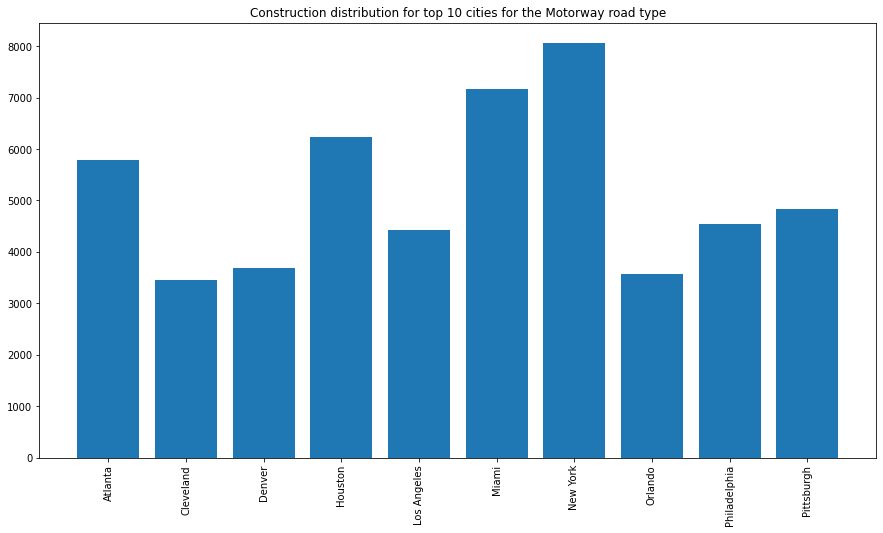

In [97]:
plt.figure(figsize= (15,8))
plt.bar(x=df_filter_state_city_group_count_motorway['City'], height=df_filter_state_city_group_count_motorway['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for top 10 cities for the Motorway road type")
plt.savefig("Construction-distribution-top-cities-for-Motorway-road-type.png")

In [98]:
df_filter_state_city_group_count_primary = df_filter_state_city_group_count[df_filter_state_city_group_count.type_of_roads == "primary"]

In [99]:
df_filter_state_city_group_count_primary.head()

,City,State,type_of_roads,counts
5,Atlanta,GA,primary,3871
18,Cleveland,GA,primary,2
26,Cleveland,OH,primary,1373
36,Cleveland,TX,primary,2
48,Denver,CO,primary,2348


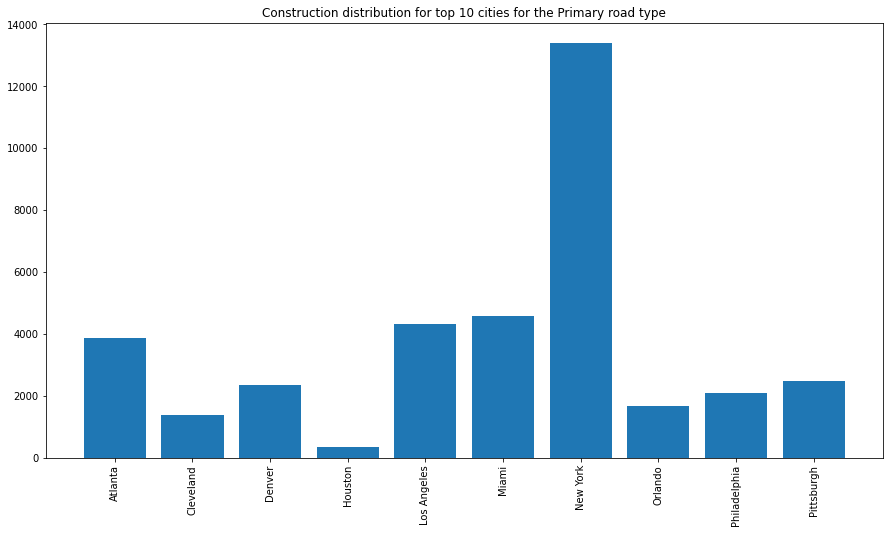

In [100]:
plt.figure(figsize= (15,8))
plt.bar(x=df_filter_state_city_group_count_primary['City'], height=df_filter_state_city_group_count_primary['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for top 10 cities for the Primary road type")
plt.savefig("Construction-distribution-top-cities-for-primary-road-type.png")

In [101]:
df_filter_state_city_group_count_secondary = df_filter_state_city_group_count[df_filter_state_city_group_count.type_of_roads == "secondary"]

In [102]:
df_filter_state_city_group_count_secondary.head()

,City,State,type_of_roads,counts
8,Atlanta,GA,secondary,6028
16,Atlanta,NY,secondary,1
17,Atlanta,TX,secondary,1
19,Cleveland,GA,secondary,1
20,Cleveland,NY,secondary,1


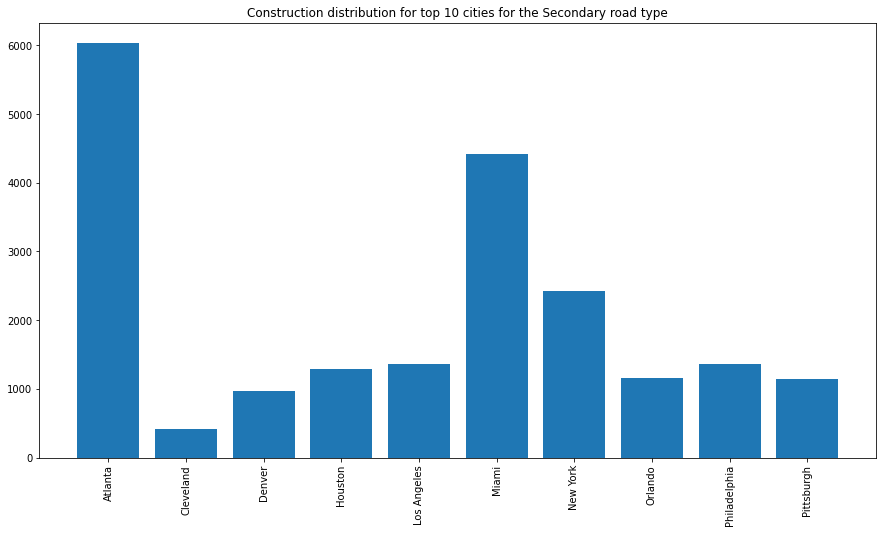

In [106]:
plt.figure(figsize= (15,8))
plt.bar(x=df_filter_state_city_group_count_secondary['City'], height=df_filter_state_city_group_count_secondary['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for top 10 cities for the Secondary road type")
plt.savefig("Construction-distribution-top-cities-for-secondary-road-type.png")

In [107]:
df_filter_state_city_group_count_motorway_link = df_filter_state_city_group_count[df_filter_state_city_group_count.type_of_roads == "motorway_link"]

In [108]:
df_filter_state_city_group_count_motorway_link.head()

,City,State,type_of_roads,counts
3,Atlanta,GA,motorway_link,4024
25,Cleveland,OH,motorway_link,2310
46,Denver,CO,motorway_link,1994
61,Denver,PA,motorway_link,13
71,Houston,PA,motorway_link,1


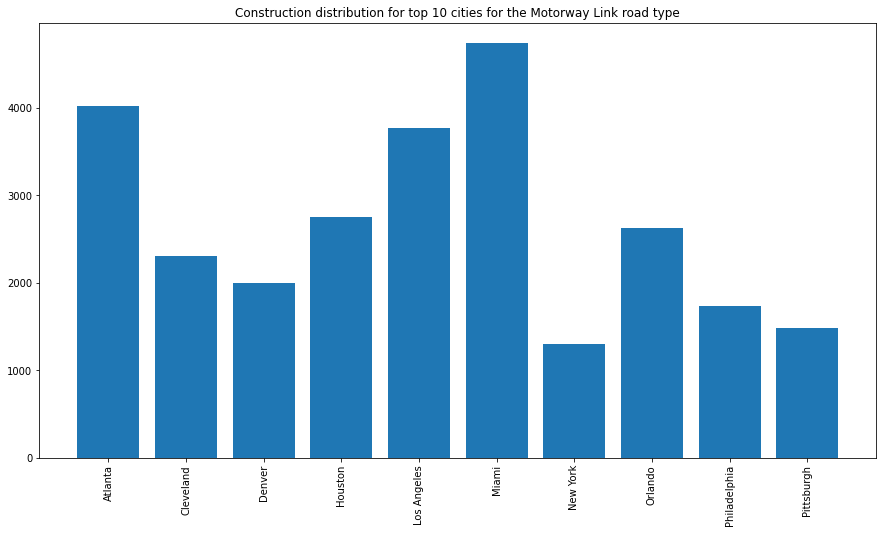

In [109]:
plt.figure(figsize= (15,8))
plt.bar(x=df_filter_state_city_group_count_motorway_link['City'], height=df_filter_state_city_group_count_motorway_link['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for top 10 cities for the Motorway Link road type")
plt.savefig("Construction-distribution-top-cities-for-motorway_link-road-type.png")

In [110]:
df_filter_state_city_group_count_residential = df_filter_state_city_group_count[df_filter_state_city_group_count.type_of_roads == "residential"]

In [111]:
df_filter_state_city_group_count_residential.head()

,City,State,type_of_roads,counts
7,Atlanta,GA,residential,3642
28,Cleveland,OH,residential,3358
37,Cleveland,TX,residential,2
50,Denver,CO,residential,1761
63,Denver,PA,residential,1


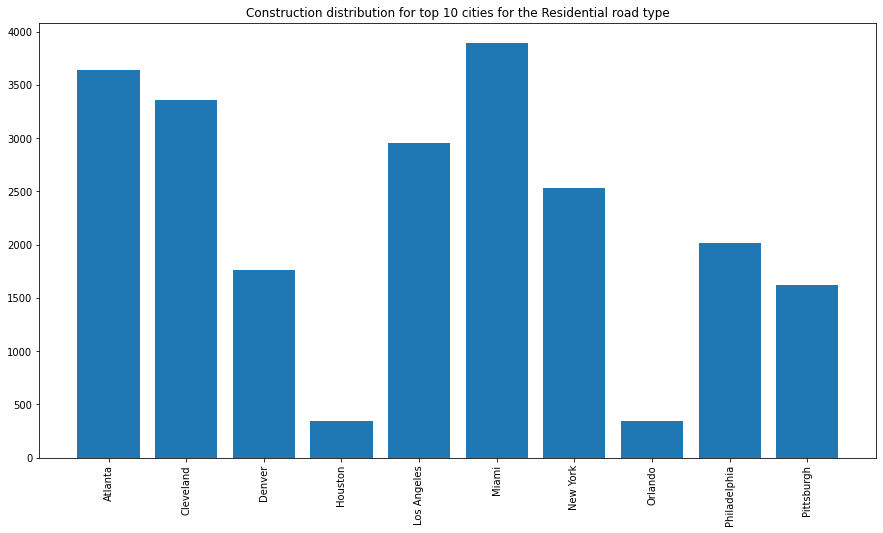

In [112]:
plt.figure(figsize= (15,8))
plt.bar(x=df_filter_state_city_group_count_residential['City'], height=df_filter_state_city_group_count_residential['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for top 10 cities for the Residential road type")
plt.savefig("Construction-distribution-top-cities-for-residentialroad-type.png")